In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
fraud_file = os.path.join(os.curdir, 'Fraud_Data.csv')
ip_file = os.path.join(os.curdir, 'IpAddress_to_Country.csv')

In [3]:
fraud = pd.read_csv(fraud_file, parse_dates=['signup_time', 'purchase_time'])
fraud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151112 entries, 0 to 151111
Data columns (total 11 columns):
user_id           151112 non-null int64
signup_time       151112 non-null datetime64[ns]
purchase_time     151112 non-null datetime64[ns]
purchase_value    151112 non-null int64
device_id         151112 non-null object
source            151112 non-null object
browser           151112 non-null object
sex               151112 non-null object
age               151112 non-null int64
ip_address        151112 non-null float64
class             151112 non-null int64
dtypes: datetime64[ns](2), float64(1), int64(4), object(4)
memory usage: 12.7+ MB


In [4]:
ip = pd.read_csv(ip_file)
ip.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138846 entries, 0 to 138845
Data columns (total 3 columns):
lower_bound_ip_address    138846 non-null float64
upper_bound_ip_address    138846 non-null int64
country                   138846 non-null object
dtypes: float64(1), int64(1), object(1)
memory usage: 3.2+ MB


In [5]:
fraud.head(20)

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,0
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0
5,159135,2015-05-21 06:03:03,2015-07-09 08:05:14,42,ALEYXFXINSXLZ,Ads,Chrome,M,18,2.809315e+09,0
6,50116,2015-08-01 22:40:52,2015-08-27 03:37:57,11,IWKVZHJOCLPUR,Ads,Chrome,F,19,3.987484e+09,0
7,360585,2015-04-06 07:35:45,2015-05-25 17:21:14,27,HPUCUYLMJBYFW,Ads,Opera,M,34,1.692459e+09,0
8,159045,2015-04-21 23:38:34,2015-06-02 14:01:54,30,ILXYDOZIHOOHT,SEO,IE,F,43,3.719094e+09,0
9,182338,2015-01-25 17:49:49,2015-03-23 23:05:42,62,NRFFPPHZYFUVC,Ads,IE,M,31,3.416747e+08,0


In [6]:
fraud['class'].value_counts()

0    136961
1     14151
Name: class, dtype: int64

In [7]:
fraud['purchase_value'].max()

154

In [8]:
fraud['purchase_value'].min()

9

In [9]:
fraud['user_id'].unique().shape

(151112,)

In [10]:
fraud['device_id'].unique().shape

(137956,)

In [11]:
fraud['signup_time'].min()

Timestamp('2015-01-01 00:00:42')

In [12]:
fraud['signup_time'].max()

Timestamp('2015-08-18 04:40:29')

In [13]:
fraud['purchase_time'].min()

Timestamp('2015-01-01 00:00:44')

In [14]:
fraud['purchase_time'].max()

Timestamp('2015-12-16 02:56:05')

In [15]:
fraud_device = set(fraud[fraud['class'] == 1]['device_id'])
clean_device = set(fraud[fraud['class'] == 0]['device_id'])

In [16]:
len(fraud_device.intersection(clean_device))

2685

In [17]:
fraud['age'].max()

76

In [18]:
fraud['age'].min()

18

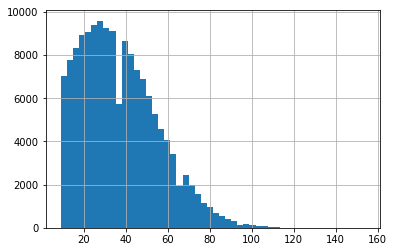

In [19]:
fraud['purchase_value'].hist(bins=50)

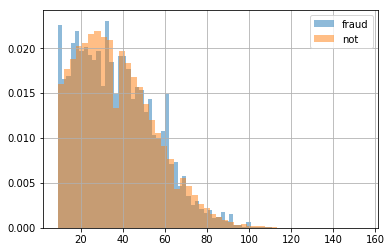

In [20]:
fraud[fraud['class'] == 1]['purchase_value'].hist(bins=50, alpha=0.5, normed=1, label='fraud')
fraud[fraud['class'] == 0]['purchase_value'].hist(bins=50, alpha=0.5, normed=1, label='not')
plt.legend()

In [21]:
ip.head(20)

,lower_bound_ip_address,upper_bound_ip_address,country
0,16777216.0,16777471,Australia
1,16777472.0,16777727,China
2,16777728.0,16778239,China
3,16778240.0,16779263,Australia
4,16779264.0,16781311,China
5,16781312.0,16785407,Japan
6,16785408.0,16793599,China
7,16793600.0,16809983,Japan
8,16809984.0,16842751,Thailand
9,16842752.0,16843007,China


In [22]:
from multiprocessing import Pool, cpu_count
from joblib import Parallel, delayed
import time

def check_ip(x):
    return ip[(ip['lower_bound_ip_address'] <= x) & (ip['upper_bound_ip_address'] >= x)]['country'].values

s = time.time()
fraud['country'] = Parallel(n_jobs=cpu_count())(delayed(check_ip)(x) for x in fraud['ip_address'])
print time.time()- s

32.6006760597


In [23]:
def create_ip_dict_helper(row):
    return (row['lower_bound_ip_address'], [row['upper_bound_ip_address'], row['country']])

def create_ip_dict(df):
    ip_dict = dict()
    for ix, row in df.iterrows():
        ip = row['lower_bound_ip_address']
        ip_dict[ip] = [row['upper_bound_ip_address'], row['country']]
    return ip_dict
s = time.time()
aaa = create_ip_dict(ip)
print len(aaa)
print time.time() - s

138846
9.12436413765


In [24]:
def found_lower_bound(arr, tar):
    '''
    found lower bound of an ip by bisection search
    '''
    if tar > 3758096383 or tar < 16777216:
        return None
    n = len(arr)
    if n == 0:
        return None
    if arr[n/2] == tar:
        return tar
    elif  arr[n/2] < tar:
        if ip_dict[arr[n/2]][0] >= tar:
            return arr[n/2]
        elif ip_dict[arr[n/2]][0] < tar:
            return found_lower_bound(arr[n/2 + 1:], tar)                                      
    elif arr[n/2] > tar:
        return found_lower_bound(arr[:n/2], tar)

def get_country(x):
    lower_bound = found_lower_bound(ip['lower_bound_ip_address'].values, x)
    if lower_bound in ip_dict:
        return ip_dict[lower_bound][1]

s = time.time()
ip_dict = create_ip_dict(ip)
fraud['coutry_test'] = fraud['ip_address'].apply(get_country)
print time.time() - s

11.8179528713


In [50]:
fraud.head(100)

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class,country,coutry_test,multiple_country,multiple_user_dev,mutiple_ip,multiple_user_ip,mutiple_device
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0,[Japan],Japan,0,0,0,0,0
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0,[United States],United States,0,0,0,0,0
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1,[United States],United States,0,1,0,1,0
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,0,[],None,0,0,0,0,0
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0,[United States],United States,0,0,0,0,0
5,159135,2015-05-21 06:03:03,2015-07-09 08:05:14,42,ALEYXFXINSXLZ,Ads,Chrome,M,18,2.809315e+09,0,[Canada],Canada,0,0,0,0,0
6,50116,2015-08-01 22:40:52,2015-08-27 03:37:57,11,IWKVZHJOCLPUR,Ads,Chrome,F,19,3.987484e+09,0,[],None,0,0,0,0,0
7,360585,2015-04-06 07:35:45,2015-05-25 17:21:14,27,HPUCUYLMJBYFW,Ads,Opera,M,34,1.692459e+09,0,[United States],United States,0,0,0,0,0
8,159045,2015-04-21 23:38:34,2015-06-02 14:01:54,30,ILXYDOZIHOOHT,SEO,IE,F,43,3.719094e+09,0,[China],China,0,0,0,0,0
9,182338,2015-01-25 17:49:49,2015-03-23 23:05:42,62,NRFFPPHZYFUVC,Ads,IE,M,31,3.416747e+08,0,[United States],United States,0,0,0,0,0


In [26]:
(fraud.groupby(['device_id']).apply(lambda x:x['ip_address'].unique().shape[0]) > 1).sum()

5465

In [27]:
(fraud.groupby(['device_id']).apply(lambda x:x['user_id'].unique().shape[0]) > 1).sum()

6175

In [28]:
(fraud.groupby(['device_id']).apply(lambda x:x['coutry_test'].unique().shape[0]) > 1).sum()

4473

In [29]:
fraud.groupby(['device_id']).apply(lambda x:x['coutry_test'].unique())

device_id
AAALBGNHHVMKG          [United Kingdom]
AAAWIHVCQELTP           [United States]
AAAXJHWCLISKY                    [None]
AAAXXOZJRZRAO          [United Kingdom]
AABFGRPBQHWFQ                    [None]
AABGCAPIYUWNC                    [None]
AABJEESQPJHDQ      [Russian Federation]
AABNLBQBKMWRG           [United States]
AABOMYDURXEQT           [United States]
AABOOVEJUXMKC                   [China]
AABOYHXAZBTLZ           [United States]
AABQZGLRSEYGR           [United States]
AABVEORDXZXUO           [United States]
AABZHGGYUMVEQ           [United States]
AACBIMMVQIFWW                   [China]
AACEEKSUWDCSU           [United States]
AACIHTWABTEMZ          [United Kingdom]
AACOSZDJHOJIZ                 [Ukraine]
AACRSKFMHVMCE                   [Japan]
AACTNBYQYAVPE           [United States]
AACUHRZNDEHGI                   [China]
AACYYBUHPLDWT           [United States]
AADEPZVZDTXGA       [Korea Republic of]
AADGMPYOPXXCX                   [Spain]
AADHZIOUTNGHW           [Unite

In [30]:
def device_feature():
    gp = fraud.groupby(['device_id'])
    mul_ip = (gp.apply(lambda x:x['ip_address'].unique().shape[0]) > 1).astype(int)
    mul_user = (gp.apply(lambda x:x['user_id'].unique().shape[0]) > 1).astype(int)
    mul_country = (gp.apply(lambda x:x['coutry_test'].unique().shape[0]) > 1).astype(int)
    df = pd.DataFrame({'mutiple_ip': mul_ip, 
                       'multiple_user_dev': mul_user,
                       'multiple_country': mul_country}).reset_index()
    return df

In [31]:
device = device_feature()

In [32]:
device.head()

,device_id,multiple_country,multiple_user_dev,mutiple_ip
0,AAALBGNHHVMKG,0,0,0
1,AAAWIHVCQELTP,0,0,0
2,AAAXJHWCLISKY,0,0,0
3,AAAXXOZJRZRAO,0,1,0
4,AABFGRPBQHWFQ,0,0,0


In [45]:
def ip_feature():
    gp = fraud.groupby(['ip_address'])
    mul_user = (gp.apply(lambda x:x['user_id'].unique().shape[0]) > 1).astype(int)
    df = pd.DataFrame({'multiple_user_ip': mul_user}).reset_index()
    return df

In [46]:
ip_info = ip_feature()

In [47]:
ip_info.head()

,ip_address,multiple_user_ip
0,52093.496895,0
1,93447.138961,0
2,105818.501505,0
3,117566.664867,0
4,131423.789042,0


In [36]:
fraud = fraud.merge(device, how='left', on='device_id')
fraud = fraud.merge(ip_info, how='left', on='ip_address')

In [48]:
fraud[fraud['class'] == 1]['multiple_user_ip'].sum()

7634

In [49]:
fraud[fraud['class'] == 0]['multiple_user_ip'].sum()

726